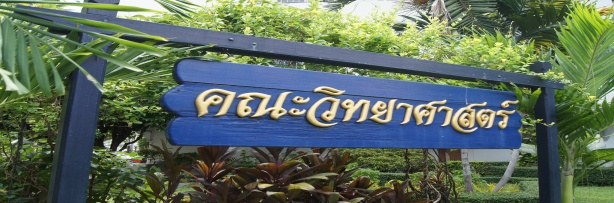

### <span style='color:Tomato;'>HSV Color image</span>
**<span style='color:orange;'>HSV stands for Hue, Saturation, and Value.</span>**  It's an alternative representation of color compared to the more familiar RGB (Red, Green, Blue) model.
1.  **<span style='color:orange;'>Hue</span>** Represents the type of color (red, green, blue, etc.) It's like a position on a color wheel and is measured in degrees (0 to 360). Think of it as the pure base color:
-  **<span style='color:red;'>0°     :</span>** Red
-  **<span style='color:lightgreen;'>120° :</span>** Green
-  **<span style='color:lightblue;'>240° :</span>** Blue

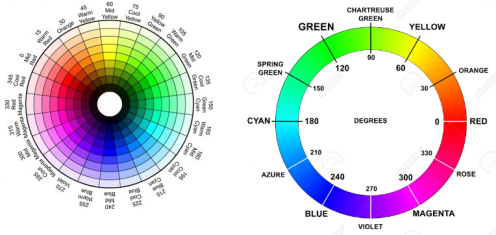   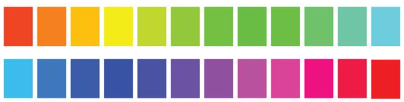

**<span style='color:lightblue;'>The color type</span>**  is depicted as an angle around the central axis of the cylinder, ranging from 0 to 360 degrees. Each angle corresponds to a color, starting with red at 0 degrees, passing through green at 120 degrees, blue at 240 degrees, and back to red at 360 degrees.

2.  **<span style='color:orange;'>Saturation:</span>** Indicates the intensity or purity of the color. Low saturation means the color is closer to gray (no color), while high saturation means a more vivid color  (full color). (0% to 100%).
-  **<span style='color:lightgreen;'>0% :</span>** Gray
-  **<span style='color:lightgreen;'>100% :</span>** The most vivid version of the hue.

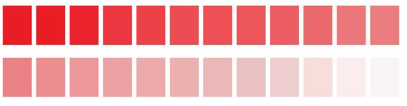     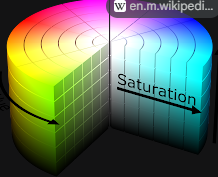

**<span style='color:lightblue;'>Saturation</span>** describes the intensity of the color, represented by the distance from the axis, with colors becoming more vibrant as they move outward from the center of the cylinder, and less vibrant, or more greyish, as they move inward.

3. **<span style='color:orange;'>Value:</span>** Represents the brightness of the color. Low value is closer to black and high value is closer to white (0% to 100%).
-  **<span style='color:lightgreen;'>0% :</span>** Black 
-  **<span style='color:lightgreen;'>100% :</span>** The brightest version of the color.

**<span style='color:lightblue;'>HSV</span>** is better suited for tasks like color segmentation since it separates color information (hue) from brightness (value). HSV is crucial in image processing because it separates image intensity (brightness) from color information. This is especially useful in applications such as object tracking, color filtering, and color manipulation, where it's easier to work with hue and saturation than directly with RGB values.



### <span style='color:Tomato;'>Why is HSV important?</span>
- **<span style='color:orange;'>Intuitive for Human Perception:</span>**  HSV aligns more closely with how humans perceive color, making it easier to select and manipulate colors based on their shade, intensity, and brightness.

- **<span style='color:orange;'>Separation of Color and Brightness:</span>**  HHSV separates the color information (hue and saturation) from the brightness (value). This is useful for tasks like adjusting image contrast without affecting the colors or isolating specific color ranges for object detection.

- **<span style='color:orange;'>Robustness to Lighting Changes:</span>**  HSV can be more robust to variations in lighting conditions than RGB, which can be helpful in computer vision applications.

**<span style='color:tomato;'>Converting an RGB image to a HSV image</span>**  involves transforming the colors from one color space to another. 

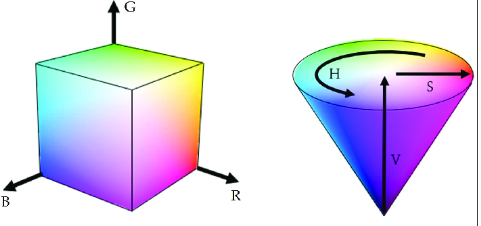

The transformation from RGB to HSV typically involves the following steps:

### <span style='color:Tomato;'>Mathematical Equations for RGB to HSV Conversion</span>
Let R, G, and B represent the red, green, and blue values of the pixel, normalized to the range [0, 1]. The HSV values (Hue, Saturation, and Value) are calculated as follows:
1.  **<span style='color:orange;'>Value (V):</span>** 

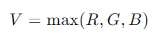

**<span style='color:lightblue;'>The color type</span>**  is depicted as an angle around the central axis of the cylinder, ranging from 0 to 360 degrees. Each angle corresponds to a color, starting with red at 0 degrees, passing through green at 120 degrees, blue at 240 degrees, and back to red at 360 degrees.

2.  **<span style='color:orange;'>Saturation (S):</span>** 

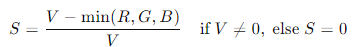

3. **<span style='color:orange;'>Hue (H):</span>** 

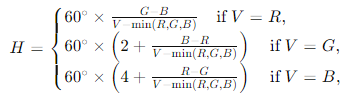



After calculating the hue, divide it by 360 to normalize it to the range [0, 1].

#### <span style='color:tomato;'>Using conventional cv2 Module</span>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def ShowImage(img, gray):
    plt.axis("off")
    if gray:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(img)
    plt.show()

In [6]:
def rgb_to_hsv(r, g, b):
    r, g, b = r / 255.0, g / 255.0, b / 255.0
    max_value = max(r, g, b)
    min_value = min(r, g, b)
    delta = max_value - min_value

    if max_value == min_value:
        h = 0
    elif max_value == r and g >= b:
        h = 60 * ((g - b) / delta)
    elif max_value == r and g < b:
        h = 60 * ((g - b) / delta) + 360
    elif max_value == g:
        h = 60 * ((b - r) / delta) + 120
    elif max_value == b:
        h = 60 * ((r - g) / delta) + 240

    if max_value == 0:
        s = 0
    else:
        s = delta / max_value

    v = max_value

    return h, s, v

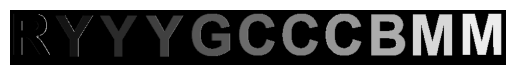

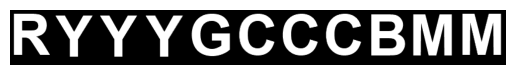

In [7]:
img = cv2.imread('./images/hsv01.png')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv = np.zeros_like(rgb, dtype=float)
for i in range(rgb.shape[0]):
    for j in range(rgb.shape[1]):
        r, g, b = rgb[i, j]
        hsv[i, j] = rgb_to_hsv(r, g, b)

ShowImage(hsv[:,:,0], 1)
ShowImage(hsv[:,:,1], 1)

In [ ]:
def track_colored_object(video_path, lower_color_bound, upper_color_bound):
    cap = cv2.VideoCapture(video_path)

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)[:,:,0]

        mask = cv2.inRange(hsv, lower_color_bound, upper_color_bound)

        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        if contours:
            largest_contour = max(contours, key=cv2.contourArea)
            x, y, w, h = cv2.boundingRect(largest_contour)
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

        cv2.imshow('Object Tracking', frame)
        if cv2.waitKey(1)   == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

video_path = 'your_video.mp4'  
lower_color = 0
upper_color = 10

track_colored_object(video_path, lower_color, upper_color)

In [ ]:
import cv2
import numpy as np

image = cv2.imread('red_object.jpg')

hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the range of red color in HSV
lower_red1 = np.array([0, 120, 70])  # Lower bound for red (0° to 10° hue)
upper_red1 = np.array([10, 255, 255])  # Upper bound for red

lower_red2 = np.array([170, 120, 70])  # Red can wrap around at 360° so we handle 170° to 180°
upper_red2 = np.array([180, 255, 255])

# Create two masks to cover both ranges of red
mask1 = cv2.inRange(hsv_image, lower_red1, upper_red1)
mask2 = cv2.inRange(hsv_image, lower_red2, upper_red2)


mask = mask1 + mask2

result = cv2.bitwise_and(image, image, mask=mask)

# Show the original image and the result
cv2.imshow('Original Image', image)
cv2.imshow('Red Object Detected', result)

# Wait until a key is pressed and close the windows
cv2.waitKey(0)
cv2.destroyAllWindows()
